In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [3]:
# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Load and preprocess dataset
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

100.0%
100.0%
100.0%
100.0%


In [6]:
# Define the Autoencoder with extra hidden layer
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 32),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adadelta(model.parameters())


In [13]:
# Train the model
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for img, _ in train_loader:
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # total_loss += loss.item()
        total_loss += loss.detach().item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/10], Loss: 0.2974
Epoch [2/10], Loss: 0.2970
Epoch [3/10], Loss: 0.2967
Epoch [4/10], Loss: 0.2964
Epoch [5/10], Loss: 0.2960
Epoch [6/10], Loss: 0.2956
Epoch [7/10], Loss: 0.2954
Epoch [8/10], Loss: 0.2950
Epoch [9/10], Loss: 0.2948
Epoch [10/10], Loss: 0.2944


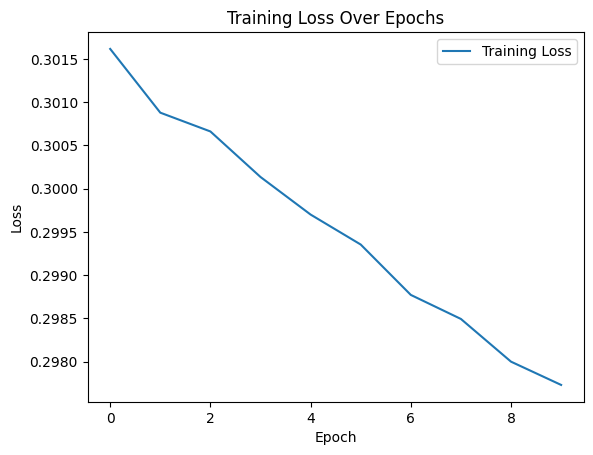

In [11]:
# Plot training loss
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

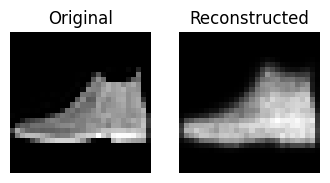

In [12]:
# Visualize original and reconstructed images
model.eval()
with torch.no_grad():
    for img, _ in test_loader:
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        break  # just one batch

original = img[0].cpu().view(28, 28)
reconstructed = output[0].cpu().view(28, 28)

plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed')
plt.axis('off')
plt.show()